In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload

In [2]:
%autoreload 2
from utils.data_loader import DataLoader
from utils.term_frequency_plotter import TermFrequency

In [3]:
loader = DataLoader()
content = loader.load_data("../Data/trainingdata.txt")

Number of Sentences:  5485



In [4]:
label_names = np.array(["A", "B", "C", "D", "E", "F", "G", "H"])

df = loader.get_data_frame(content, label_names)

In [5]:
df.head()

,Labels,Text
0,A,champion products ch approves stock split cham...
1,B,computer terminal systems cpml completes sale ...
2,A,cobanco inc cbco year net shr cts vs dlrs net ...
3,A,am international inc am nd qtr jan oper shr lo...
4,A,brown forman inc bfd th qtr net shr one dlr vs...


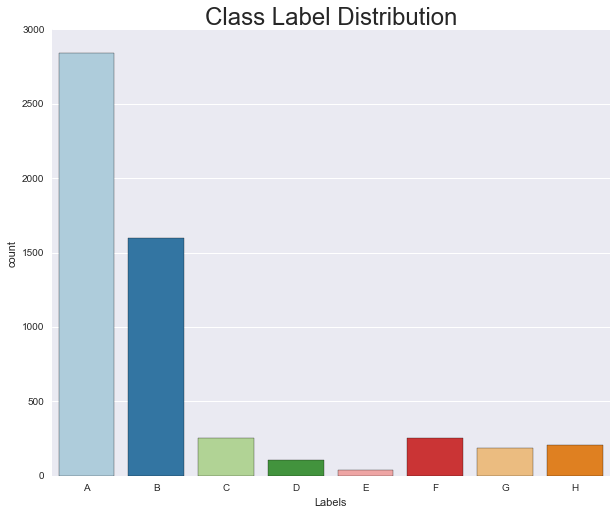

In [6]:
plt.figure(figsize=(10, 8))
sns.countplot(x="Labels", data=df, palette="Paired")
plt.title("Class Label Distribution", fontsize=24)
plt.show()

In [7]:
corpus = df["Text"].as_matrix()
min_df = 1

tf = TermFrequency(
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df = min_df,
    max_features=None,
    vocabulary=None)

tf.vectorize_corpus(corpus)

In [8]:
tf.vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

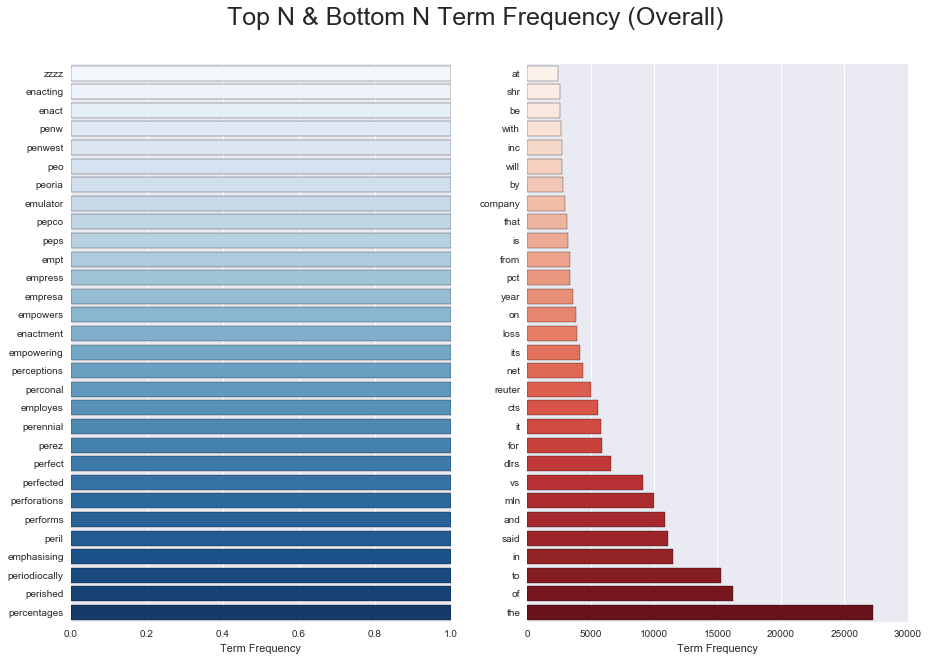

In [9]:
word_count = tf.X.sum(axis = 0).getA().squeeze()
tf.run_term_freq_plot(word_count,
                      N = 30,
                      title = "Top N & Bottom N Term Frequency (Overall)",
                      figsize=(15, 10))

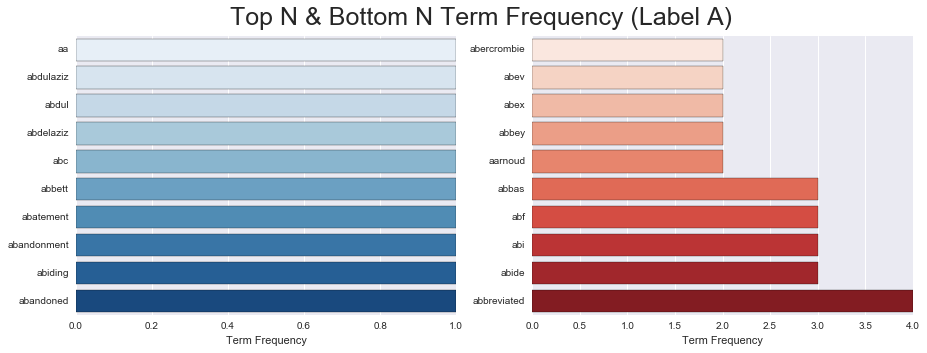

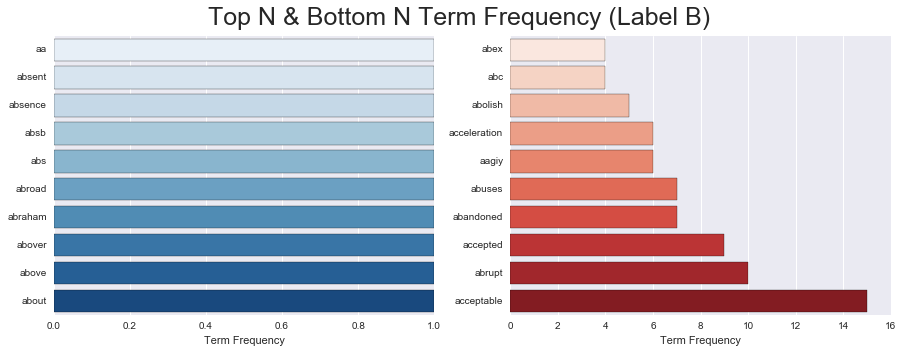

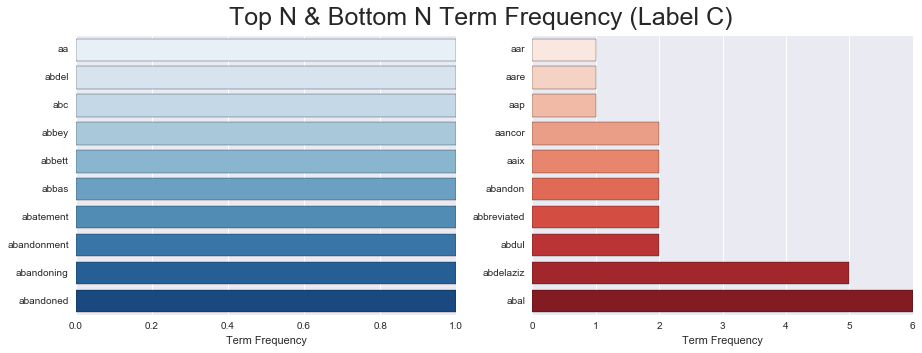

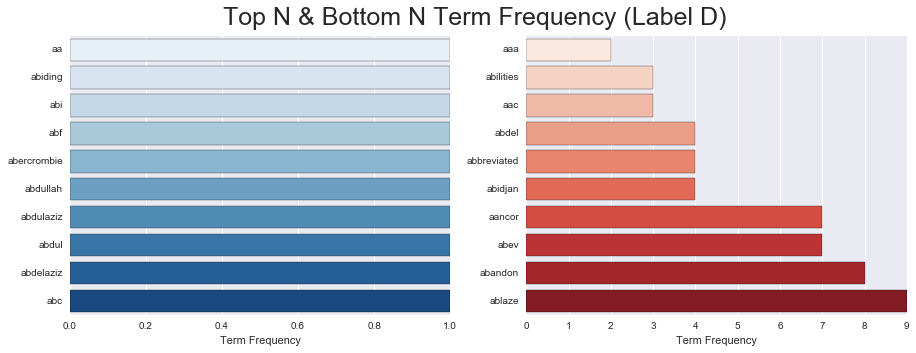

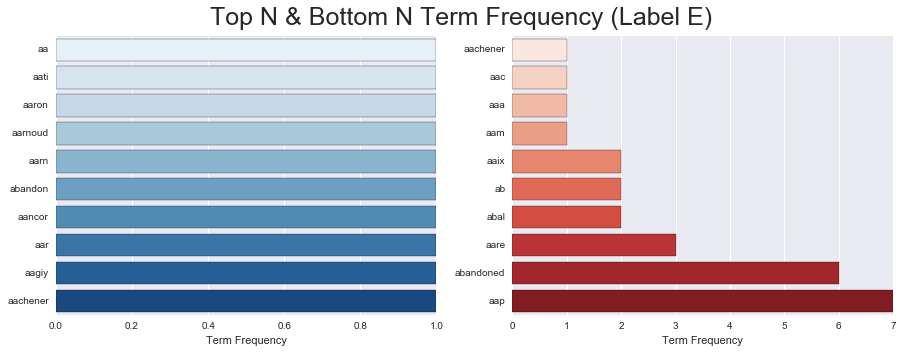

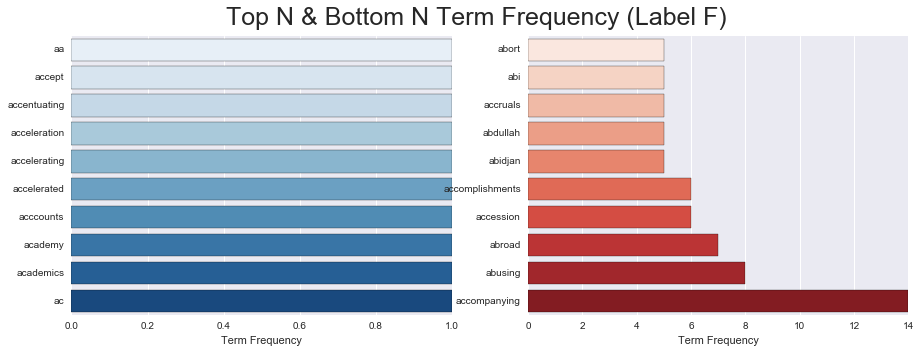

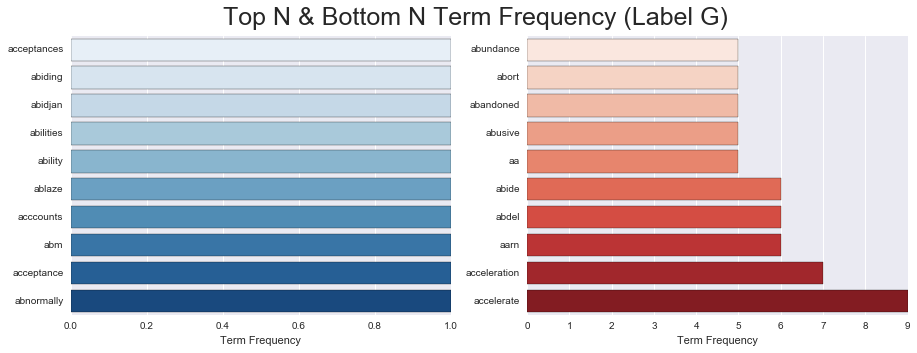

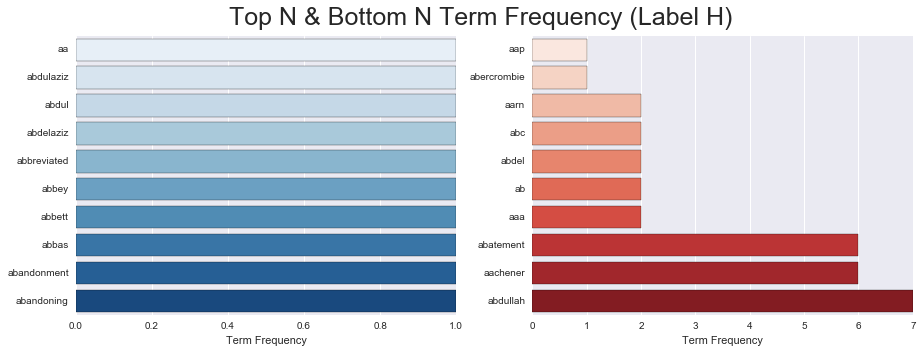

In [10]:
for idx, label in enumerate(label_names):
    
    count_vect = tf.X.getrow(idx).toarray().squeeze()
    word_count = np.array(list(filter(lambda count: count >= min_df, count_vect)))
    tf.run_term_freq_plot(word_count,
                          N = 10,
                          title = "Top N & Bottom N Term Frequency (Label {})".format(label),
                          figsize=(15, 5))